## Introducción a la Visión Computacional
## Tarea 1
-----------------------
<div align="right">
Fecha de Entrega: Miércoles 5, Abril 2022.
</div>

1. Buscar una base de datos (dataset) de imágenes abierta. Por ejemplo, de Kaggle (https://www.kaggle.com/datasets?tags=13207-Computer+Vision). Si dispone de una base de datos propia (o tiene acceso a alguna no pública), también  puede ser utilizada. Hacer una breve descripción de esta base de datos: número de fotos, sensor con el cual fue obtenido, condiciones ambientales, tipos de elementos que aparecen (automóviles, animales, insectos, caras, entre otros)

2. Buscar una aplicación interesante para ese conjunto de imágenes. Se debe justificar en un párrafo el por qué es una aplicación que valga la pena implementar o realizar. La aplicación requeriría detectar o medir algo y en forma automatizada dentro de cada imagen.

3. Hacer pre-procesamiento simple:
    + Implementar un código que realice en forma masiva un cambio de resolución de las imágenes (por ejemplo unas 100 a una resolución menor, por ejemplo, 256x256 o 512x512). Para ello, las imágenes fuente deben estar en un directorio y las de salida en uno diferente.
    + Implementar un código que filtre (por ejemplo, gaussiano) las imágenes y las deje en un nuevo directorio.


Debe documentar en un breve informe lo realizado: puede ser en formato pdf, o bien en un notebook.

Más importante que mostrar la totalidad de lo procesado, es mostrar solamente algunos casos que sean ilustrativos, junto con algunos específicos que se no se ajusten al común o promedio de los resultados. Tan importante como mostrar estos resultados mencionados, son los comentarios de la particularidad que tienen los casos a reportar.

# Base de datos de patentes de vehiculos de Chile

Base de datos recopilada por mi, en imagenes de Google, las cuales fueran fotografias de patentes de vehiculos chilenos, con esto me gustaria realizar un posterior analisis, obteniendo las letras y numeros para consultar en [autoseguro.gob.cl](https://www.autoseguro.gob.cl) de carabineros y policia de investigaciones, con el objetivo de verificar si un vehiculo tiene encargo por robo.

En este caso para el pre-procesamiento de imagenes, se aplica el filtro sobel, para poder obtener la deteccion de bordes, con esto podemos tener la capacidad de detectar medianamente bien las letras y numeros de las patentes.

In [24]:
import os
from PIL import Image
from numpy import *
from scipy.ndimage import sobel
from matplotlib import pyplot as plt

In [25]:
'''
Obtiene las imagenes definidas en el classpath del proyecto, con los formatos que se establecen en el segundo parametro
    - path: direccion donde estaran alojadas las imagenes a procesar
    - extension: lista de extensiones que seran tomadas en cuenta para obtencion de imagenes
'''
def get_image_list_from_path(path, extension):
    l = []
    for ex in extension:
        for f in os.listdir(path):
            if f.endswith(ex):
                l.append(os.path.join(path,f))

    return l

In [37]:
img_list = get_image_list_from_path("patentes", [".png", ".jpeg"])

In [52]:
'''
Guarda las imagenes que ya fueron guardadas en el classpath, con una resolucion diferente
    - x: resolucion al eje x
    - y: resolucion al eje y
    - img_list: lista de imagenes que seran procesadas a la resolucion pasada en los parametros x e y
'''
def save_resized_images_resx_resy(x, y, img_list):
    os.makedirs("out{}x{}/patentes".format(x, y), exist_ok=True)

    for img in img_list:
        Image.open(img).convert('RGB').resize((x, y))\
            .save("out{}x{}/{}.jpg".format(x, y, img))

In [53]:
save_resized_images_resx_resy(512, 512, img_list)

In [54]:
def sobel_filter(path):
    im = array(Image.open(path).convert('L'), 'f')
    imx = zeros(im.shape)
    sobel(im, 1, imx) #Filas (X)

    imy = zeros(im.shape)
    sobel(im, 0, imy) #Columnas (Y)

    magnitude = sqrt(imx**2+imy**2)

    plt.imshow(magnitude, plt.get_cmap('gray'))
    plt.show()

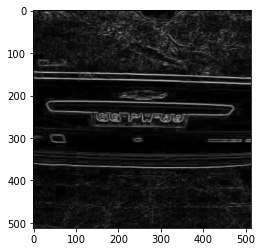

In [55]:
sobel_filter("/Users/nicolas/DataScience/CuartoTrimestre/VisionComputacional/Tareas/Tarea1/out512x512/patentes/43.jpeg.jpg")